In [1]:
#Multiple linear regression is an extension of Simple linear regression.

In [2]:
#Simple linear regression deals with one independent vairiable and one dependent variable.

$$ y = mx + b $$
$$ or $$
$$ y = b_0 + b_1X$$

In [3]:
#multiple linear regression deals with multiple independent variables and one dependent variable:

$$ y = b_0 + b_1X_1 + b_2X_2 + b_3X_3+..... $$

In [4]:
#imports:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [5]:
#we shall explore housing prices data

In [6]:
housing = pd.read_csv("housingKinC.csv")
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
#checking null values in all columns
#sns.heatmap(housing.isnull(), cbar=False )

In [8]:
#Since very few null values are there, let us drop those rows.
housing.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#No columns have null values.

In [10]:
# Lets check releation ship between each columns and price

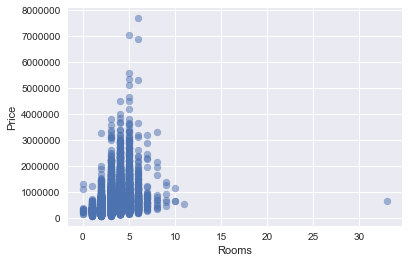

In [11]:
plt.scatter(housing.bedrooms, housing.price, alpha=0.5)
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

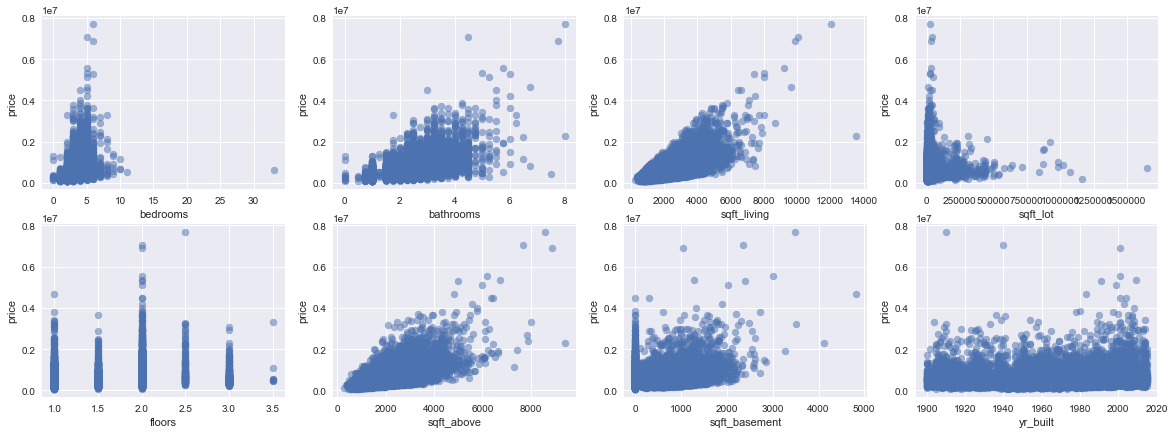

In [12]:
x=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built']
subplots= [241,242,243,244,245,246,247,248]

fig = plt.figure(figsize=(20,7))
for i in range(len(x)):
    ax = fig.add_subplot(subplots[i])
    ax.scatter(housing[x[i]], housing['price'], alpha=0.5)
    ax.set_xlabel(x[i])
    ax.set_ylabel('price')
    

In [13]:
#we can observe almost all coumns considered have linear relationship with price

In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [15]:
#id, date, lat, lon, zipcode - > we will remove this


In [16]:
housing['sqft_lot'].corr(housing['sqft_lot15'])

0.7185567524330345

In [17]:
housing['sqft_living'].corr(housing['sqft_living15'])

0.7564202590172213

In [18]:
#sqft_lot and sqft_lot15 are highly correlated. so we will drop one
#sqft_living and sqft_living15 are highly correlated. so we will drop one

In [19]:
housing = housing.drop(['id','date','sqft_living','sqft_lot','zipcode','lat','long' ],axis=1)

In [20]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(3), int64(11)
memory usage: 2.3 MB


In [21]:
X = housing.drop(['price'],axis=1)
X.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [22]:
y = housing.price
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [25]:
X_train.shape

(15129, 13)

In [26]:
X_test.shape

(6484, 13)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lrModel = LinearRegression()

In [29]:
lrModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
y_pred = lrModel.predict(X_test)

In [31]:
lrModel.intercept_

6092796.833694851

In [32]:
lrModel.coef_

array([-3.52309366e+04,  4.27048061e+04,  2.65350536e+04,  5.75473767e+05,
        4.63011028e+04,  1.92116266e+04,  1.22246666e+05,  1.51548954e+02,
        1.53323524e+02, -3.52004573e+03,  6.87443992e+00,  2.37697773e+01,
       -4.63181197e-01])

In [33]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [34]:
coeffs = pd.DataFrame({'acolumns':X_train.columns,'bcoeffs':lrModel.coef_})
coeffs

,acolumns,bcoeffs
0,bedrooms,-35230.936603
1,bathrooms,42704.806061
2,floors,26535.053629
3,waterfront,575473.766501
4,view,46301.102845
5,condition,19211.626645
6,grade,122246.665849
7,sqft_above,151.548954
8,sqft_basement,153.323524
9,yr_built,-3520.045726


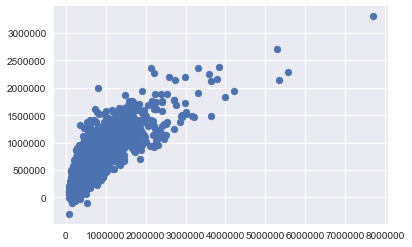

In [35]:
plt.scatter(y_test,y_pred)

In [36]:
#If the plot was a perfectly straight line, it have been a perfect model

In [37]:
#evaluation metrics for regression problems:

In [38]:
from sklearn import metrics

In [39]:
#mean absolute error:
metrics.mean_absolute_error(y_test,y_pred)

140929.08586563304

In [40]:
#mean squared error
metrics.mean_squared_error(y_test,y_pred)

51873185961.91133

In [41]:
#root mean squared error
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

227756.85711282401

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6489917511818116